In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow import keras

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten

In [5]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib
import matplotlib.pyplot as pl
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
from skimage import exposure
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

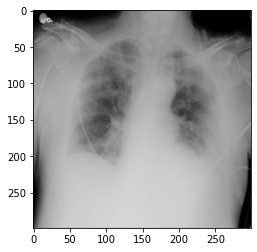

In [7]:
image = image.load_img("D:/DL/Covid-19/Covid-New/training_set/COIVD/COVID-1.png")
plt.imshow(image)

In [8]:
IMAGE_SIZE = [224, 224]

train_path = 'D:/DL/Covid-19/Covid-New/training_set'
valid_path = 'D:/DL/Covid-19/Covid-New/test_set'

In [9]:
path_name = train_path + '/**/*.png'

In [10]:
imagePatches = glob(path_name, recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-1.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-10.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-100.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-1000.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-1001.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-1002.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-1003.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-1004.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-1005.png
D:/DL/Covid-19/Covid-New/training_set\COIVD\COVID-1006.png


In [11]:
# Plot Multiple Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (225.0, 225.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [12]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
for layer in vgg.layers:
    layer.trainable = False

In [14]:
folders = glob('D:/DL/Covid-19/Covid-New/training_set/*')
x = Flatten()(vgg.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/DL/Covid-19/Covid-New/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/DL/Covid-19/Covid-New/test_set',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 6000 images belonging to 3 classes.
Found 1646 images belonging to 3 classes.


In [167]:
training_set.class_indices

{'COIVD': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [20]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
600/600 [==============================] - 1625s 3s/step - loss: 0.3881 - accuracy: 0.8638 - val_loss: 0.4481 - val_accuracy: 0.8426
Epoch 2/50
600/600 [==============================] - 1584s 3s/step - loss: 0.2938 - accuracy: 0.9030 - val_loss: 0.3980 - val_accuracy: 0.8676
Epoch 3/50
600/600 [==============================] - 1542s 3s/step - loss: 0.2504 - accuracy: 0.9182 - val_loss: 0.6267 - val_accuracy: 0.8153
Epoch 4/50
600/600 [==============================] - 1510s 3s/step - loss: 0.2442 - accuracy: 0.9230 - val_loss: 0.3748 - val_accuracy: 0.8888
Epoch 5/50
600/600 [==============================] - 1499s 2s/step - loss: 0.2201 - accuracy: 0.9313 - val_loss: 0.2448 - val_accuracy: 0.9216
Epoch 6/50
600/600 [==============================] - 1506s 3s/step - loss: 0.1934 - accuracy: 0.9383 - val_loss: 0.1879 - val_accuracy: 0.9417
Epoch 7/50
600/600 [==============================] - 1518s 3s/step - loss: 0.2035 - accuracy: 0.9342 - val_loss: 0.2453 - val_accuracy:

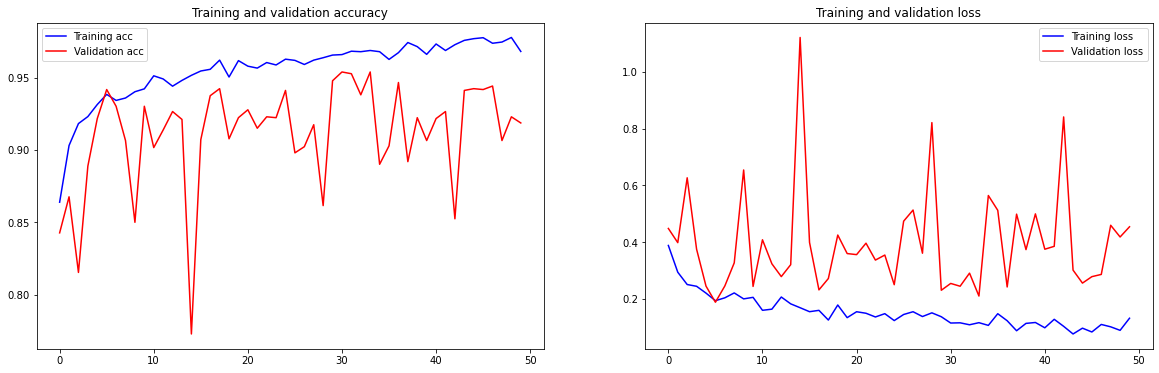

In [21]:
def plot_results(r):
    acc = r.history['accuracy']
    val_acc = r.history['val_accuracy']
    loss = r.history['loss']
    val_loss = r.history['val_loss']

    epoch = range(50)

    fig = plt.figure(figsize=(20,6))
    ax1 = fig.add_subplot(121)
    plt.plot(epoch, acc, 'b', label='Training acc')
    plt.plot(epoch, val_acc, 'r', label='Validation acc')
    ax1.set_title('Training and validation accuracy')
    ax1.legend()

    ax2 = fig.add_subplot(122) 
    plt.plot(epoch, loss, 'b', label='Training loss')
    plt.plot(epoch, val_loss, 'r', label='Validation loss')
    ax2.set_title('Training and validation loss')
    ax2.legend()

    plt.show()

plot_results(r)

In [592]:
import tensorflow as tf
from keras.models import load_model

model.save('xray.h5')

In [593]:
from keras.models import load_model

In [594]:
from keras.preprocessing import image

In [595]:
from keras.applications.vgg16 import preprocess_input

In [596]:
import numpy as np

In [597]:
model=load_model('xray.h5')

In [598]:
img1=image.load_img('D:/DL/Covid-19/Prediction/X9.png',target_size=(224,224))

In [599]:
x=image.img_to_array(img1)

In [600]:
x=np.expand_dims(x, axis=0)

In [601]:
img_data=preprocess_input(x)

In [602]:
classes=model.predict(img_data)

In [603]:
result=int(classes[0][2])
print(result)

0


Person is Affected by Covid-19


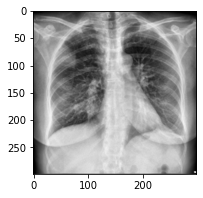

In [604]:
img = cv2.imread('D:/DL/Covid-19/Prediction/X9.png')
img = exposure.equalize_adapthist(img/np.max(img))
plt.figure(figsize = (3,3))
plt.imshow(img, 'gray')
#if result == 0:
#    print("Person is Affected by Covid-19")
#else:
#    print("Normal")

if result<=0.5:
    print("flag_1")
elif result<=1.5:
    print("flag_2")
else:
    print("flag_3")

In [422]:
img=image.load_img('D:/DL/Covid-19/Prediction/N10.png',target_size=(224,224))

In [423]:
x=image.img_to_array(img)

In [424]:
x=np.expand_dims(x, axis=0)

In [425]:
img_data=preprocess_input(x)

In [426]:
classes=model.predict(img_data)

In [427]:
result=int(classes[0][1])
Y=result
print(Y)

1


Normal


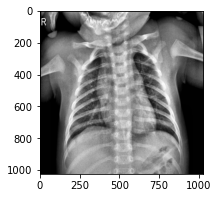

In [428]:
img = cv2.imread('D:/DL/Covid-19/Prediction/N10.png')
img = exposure.equalize_adapthist(img/np.max(img))
plt.figure(figsize = (3,3))
plt.imshow(img, 'gray')

if Y==0:
    print("Person is Affected by Covid-19")
else:
    print("Normal")

In [584]:
img=image.load_img('D:/DL/Covid-19/Prediction/P (8).png',target_size=(224,224))

In [585]:
x=image.img_to_array(img)

In [586]:
x=np.expand_dims(x, axis=0)

In [587]:
img_data=preprocess_input(x)

In [588]:
classes=model.predict(img_data)

In [589]:
result=int(classes[0][1])
Y=result
print(Y)

1


Person is Affected by Viral Pneumonia


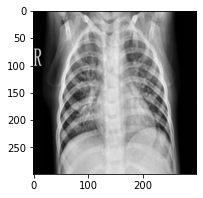

In [591]:
img = cv2.imread('D:/DL/Covid-19/Prediction/P (8).png')
img = exposure.equalize_adapthist(img/np.max(img))
plt.figure(figsize = (3,3))
plt.imshow(img, 'gray')

if Y==0:
    print("Person is Affected by Covid-19")
else:
    print("Person is Affected by Viral Pneumonia")

Course work Case study Submitted to Amity Future Academy by

1.	Rajagopal Krishnamurthy
2.	Sudi Abubakari
3.	Aditya Kuche

